In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_palette("rocket")
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io
scholarship_df = pd.read_excel(io.BytesIO(uploaded['dataset_combined.xlsx']))
print(scholarship_df.head(5))


Saving dataset_combined.xlsx to dataset_combined.xlsx
                                                Name Education Qualification  \
0  INSPIRE Scholarship 2022-23 ? Scholarship for ...           Undergraduate   
1  INSPIRE Scholarship 2022-23 ? Scholarship for ...           Undergraduate   
2  INSPIRE Scholarship 2022-23 ? Scholarship for ...           Undergraduate   
3  INSPIRE Scholarship 2022-23 ? Scholarship for ...           Undergraduate   
4  INSPIRE Scholarship 2022-23 ? Scholarship for ...           Undergraduate   

  Gender Community   Religion Exservice-men Disability Sports  \
0   Male   General      Hindu           Yes        Yes    Yes   
1   Male   General      Hindu           Yes        Yes     No   
2   Male   General     Muslim           Yes        Yes    Yes   
3   Male   General     Muslim           Yes        Yes     No   
4   Male   General  Chirstian           Yes        Yes    Yes   

  Annual-Percentage     Income India  Outcome  
0            90-100  Upto 

In [3]:
scholarship_df.describe()

,Outcome
count,245760.000000
mean,0.133333
std,0.339935
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [4]:
scholarship_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245760 entries, 0 to 245759
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Name                     245760 non-null  object
 1   Education Qualification  245760 non-null  object
 2   Gender                   245760 non-null  object
 3   Community                245760 non-null  object
 4   Religion                 245760 non-null  object
 5   Exservice-men            245760 non-null  object
 6   Disability               245760 non-null  object
 7   Sports                   245760 non-null  object
 8   Annual-Percentage        245760 non-null  object
 9   Income                   245760 non-null  object
 10  India                    245760 non-null  object
 11  Outcome                  245760 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 22.5+ MB


In [5]:
scholarship_df.columns

Index(['Name', 'Education Qualification', 'Gender', 'Community', 'Religion',
       'Exservice-men', 'Disability', 'Sports', 'Annual-Percentage', 'Income',
       'India', 'Outcome'],
      dtype='object')

In [6]:
for col in scholarship_df.columns:
    print( scholarship_df[col].value_counts() )
    print("-"*50)

Name
INSPIRE Scholarship 2022-23 ? Scholarship for Higher Education (SHE)                 24576
Abdul Kalam Technology Innovation National Fellowship                                24576
AAI Sports Scholarship Scheme in India 2022-23                                       24576
Glow and lovely Career Foundation Scholarship                                        24576
National Fellowship for Persons with Disabilities                                    24576
ONGC Sports Scholarship Scheme 2022-23                                               24576
Pragati Scholarship ? AICTE-Scholarship Scheme to Girl Child                         24576
Dr. Ambedkar post matric Scholarship                                                 24576
Indira Gandhi Scholarship for Single Girl Child UGC Scholarship for PG Programmes    24576
National Overseas Scholarship Scheme 2021-22                                         24576
Name: count, dtype: int64
--------------------------------------------------
Educatio

In [7]:
def get_graph_data(scholarship_df, feature_col):
    df_0 = scholarship_df[ scholarship_df["Outcome"]==0 ][[feature_col,"Outcome"]].groupby(feature_col).count()
    df_0 = df_0.reset_index()
    df_1 = scholarship_df[ scholarship_df["Outcome"]==1 ][[feature_col,"Outcome"]].groupby(feature_col).count()
    df_1 = df_1.reset_index()
    df = pd.DataFrame()
    df[feature_col] = df_0[feature_col]
    df["Outcome=0"] = df_0["Outcome"]
    df["Outcome=1"] = df_1["Outcome"]
    df["Outcome_Total"] = df["Outcome=0"] + df["Outcome=1"]
    df["Outcome=0 %"] = ( df["Outcome=0"] / df["Outcome_Total"] ) * 100
    df["Outcome=1 %"] = ( df["Outcome=1"] / df["Outcome_Total"] ) * 100
    return df

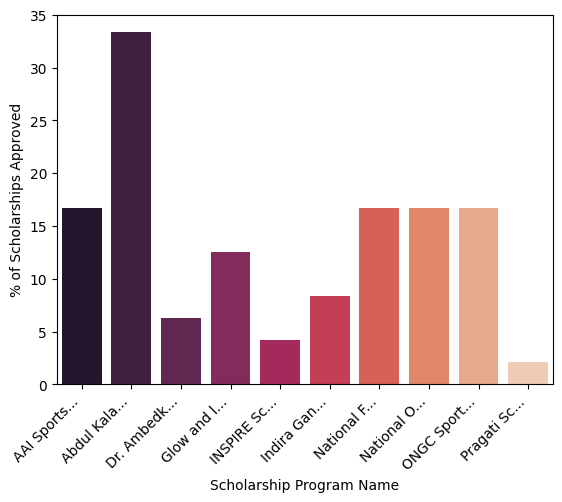

In [8]:
df_name = get_graph_data(scholarship_df, "Name")
df_name["Name_fmt"] = df_name["Name"].apply(lambda x: x[0:10] + "...")
ax = sns.barplot(data=df_name, x="Name_fmt", y="Outcome=1 %",palette="rocket")
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Scholarship Program Name")
plt.ylabel("% of Scholarships Approved")
plt.show()

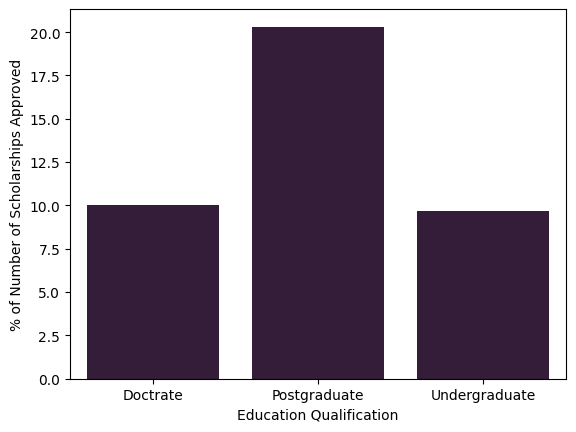

In [9]:
df_education = get_graph_data(scholarship_df, "Education Qualification")
ax = sns.barplot(data=df_education, x="Education Qualification", y="Outcome=1 %")
plt.xlabel("Education Qualification")
plt.ylabel("% of Number of Scholarships Approved")
plt.show()

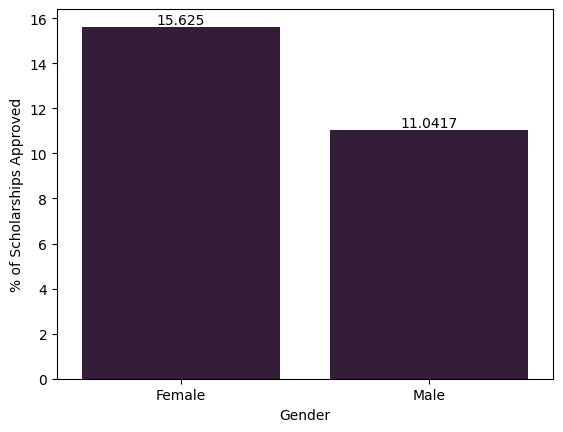

In [10]:
df_gender = get_graph_data(scholarship_df, "Gender")
ax = sns.barplot(data=df_gender, x="Gender", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Gender")
plt.ylabel("% of Scholarships Approved")
plt.show()

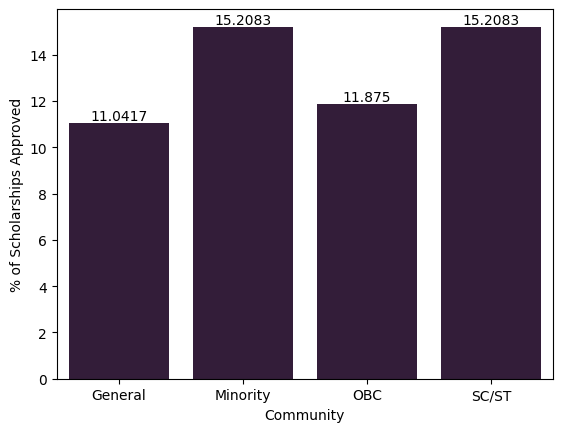

In [11]:
df_community = get_graph_data(scholarship_df, "Community")
df_community
ax = sns.barplot(data=df_community, x="Community", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Community")
plt.ylabel("% of Scholarships Approved")
plt.show()

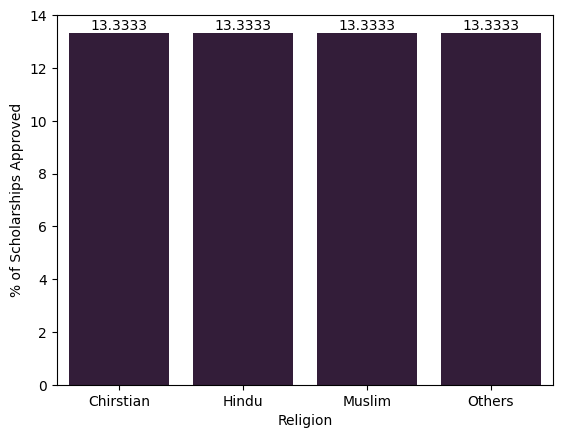

In [12]:
df_community = get_graph_data(scholarship_df, "Religion")
ax = sns.barplot(data=df_community, x="Religion", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Religion")
plt.ylabel("% of Scholarships Approved")
plt.show()

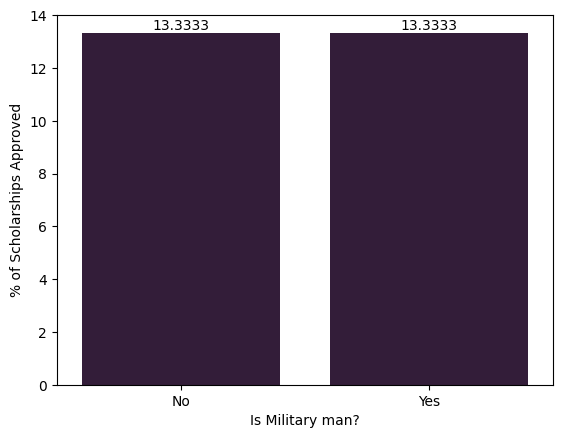

In [13]:
df_community = get_graph_data(scholarship_df, "Exservice-men")
ax = sns.barplot(data=df_community, x="Exservice-men", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Is Military man?")
plt.ylabel("% of Scholarships Approved")
plt.show()

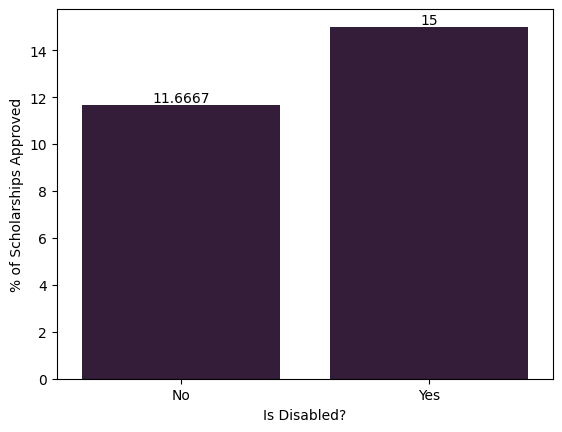

In [14]:
df_community = get_graph_data(scholarship_df, "Disability")
ax = sns.barplot(data=df_community, x="Disability", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Is Disabled?")
plt.ylabel("% of Scholarships Approved")
plt.show()

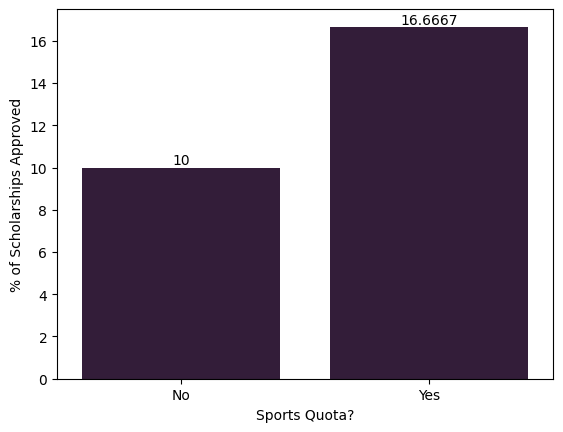

In [15]:
df_community = get_graph_data(scholarship_df, "Sports")
ax = sns.barplot(data=df_community, x="Sports", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Sports Quota?")
plt.ylabel("% of Scholarships Approved")
plt.show()

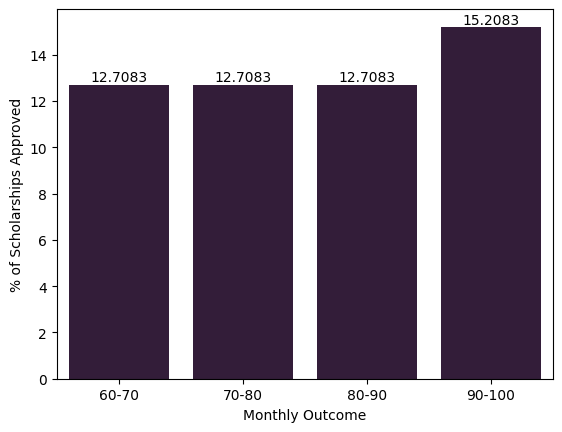

In [16]:
df_community = get_graph_data(scholarship_df, "Annual-Percentage")
df_community
ax = sns.barplot(data=df_community, x="Annual-Percentage", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Monthly Outcome")
plt.ylabel("% of Scholarships Approved")
plt.show()

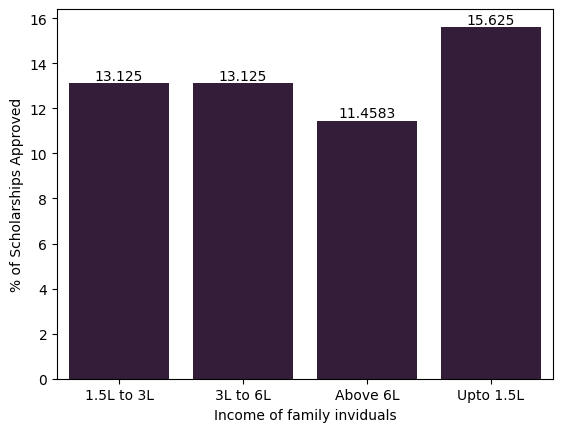

In [17]:
df_community = get_graph_data(scholarship_df, "Income")
ax = sns.barplot(data=df_community, x="Income", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Income of family inviduals")
plt.ylabel("% of Scholarships Approved")
plt.show()

In [18]:
X = scholarship_df.drop("Outcome", axis=1)
y = scholarship_df["Outcome"]

In [19]:
X.head()

,Name,Education Qualification,Gender,Community,Religion,Exservice-men,Disability,Sports,Annual-Percentage,Income,India
0,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Hindu,Yes,Yes,Yes,90-100,Upto 1.5L,In
1,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Hindu,Yes,Yes,No,90-100,Upto 1.5L,In
2,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Muslim,Yes,Yes,Yes,90-100,Upto 1.5L,In
3,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Muslim,Yes,Yes,No,90-100,Upto 1.5L,In
4,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Chirstian,Yes,Yes,Yes,90-100,Upto 1.5L,In


In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Outcome, dtype: int64